# **Task-03**

## ***Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.***

# ***1.0 About Author***
- **Author:** *Mehak Iftikhar*
- **Project:** *Bank Marketing Data*

## ***Contact Info:***
*Click on link below to contact/follow/correct me:*

- ***Email:*** mehakkhan301007@gmail.com
- [LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/)
- [Facebook](https://www.facebook.com/profile.php?id=61552023122774)
- [Twitter](https://twitter.com/mehakkhan874)
- [Github](https://github.com/mehakiftikhar)

# ***2.0 About Data***
- **Title:** *Bank Marketing Data*
- **Dataset:** [link](https://www.kaggle.com/datasets/rouseguy/bankbalanced/)

  ## ***Metadata***
  **`Data Age:`** *Not specified (Updated 7 years ago)*\
  **`License:`** *CC0: Public Domain*

***Categorical Variables:***
- **job:** *admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student*
- **marital:** *married, single, divorced*
- **education:** *secondary, tertiary, primary, unknown*
- **default:** *yes, no*
- **housing:** *yes, no*
- **loan:** *yes, no*
- **deposit:** *yes, no (Dependent Variable)*
- **contact:** *unknown, cellular, telephone*
- **month:** *jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec*
- **poutcome:** *unknown, other, failure, success*

***Numerical Variables:***
- **age**
- **balance**
- **day**
- **duration**
- **campaign**
- **pdays**
- **previous**

### ***2.1 Task:***
 *Exploring the Bank Marketing Dataset involves a step-by-step process. First, we clean and prepare the data to ensure it's accurate and consistent. Then, we summarize the data using descriptive statistics like averages and ranges. Next, we visualize the data with charts and graphs to see patterns and relationships. We detect outliers, which are unusual data points, and test our assumptions about the data. After pre-processing, we train a machine learning model and then call, train, and predict the model.*

### ***2.3 Kernel Version Used:***
- *Python 3.11.5*

# ***3.0 Data Preparation:***

## ***3.1 Import Libraries***

*Let's start the project by impoprting all the libraries that we will need in this project.*

In [28]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## ***3.2 Data Loading and Exploration | Cleaning***

### ***3.2.1 Load the Dataset***

In [29]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('../Dataset/bank.csv')

### ***Set the option to show maximum columns:***

In [30]:
pd.set_option('display.max_columns', None)

### ***3.2.2 Get a sneak peek of data:***
*The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest.*

In [31]:
# print the first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### ***3.2.3 Explore the Data***

In [32]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### ***Let's have a look on the shape of the dataset:***

In [33]:
# data shpae
df.shape

(11162, 17)

### ***Lets see the column name:***

In [34]:
# Lets see the column name
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### ***Observation Set 1:***
   - *There are `11162 rows` and `17 columns` in the dataset.*
- *The columns are of different data types.*
-  *The columns in the datasets are:*
   - *'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',*
      *'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',*
      *'previous', 'poutcome', 'deposit'*

### ***3.2.4 Descriptive Statistics:***
*Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.*

In [35]:
# Summary Statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# ***4.0 Dealing with Missing Values***

In [37]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64

## ***Milestone 1:*** *There are no missing values in the dataset.*

# ***5.0 Dealing with Outliers***

In [38]:
# make box plots of all the numeric columns using plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='balance')
fig.show()

fig = px.box(data_frame=df, y='day')
fig.show()

fig = px.box(data_frame=df, y='duration')
fig.show()

fig = px.box(data_frame=df, y='campaign')
fig.show()

fig = px.box(data_frame=df, y='pdays')
fig.show()

fig = px.box(data_frame=df, y='previous')
fig.show()


In [39]:
# Step 1: Calculate the first and third quartile
Q1 = np.percentile(df['balance'], 25)
Q3 = np.percentile(df['balance'], 75)

# Step 2: Calculate the IQR
IQR = Q3 - Q1

# Step 3: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 4: Print the data before removing outliers
print("Data before removing outliers:")
print(df.head())

# Step 5: Print the lower and upper bounds
print("----------------------------------------")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("----------------------------------------")

# Step 6: Identify and remove the outliers
data_without_outliers = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Step 7: Print the data without outliers
print("Data after removing outliers:")
print(data_without_outliers.head())

Data before removing outliers:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
----------------------------------------
Lower Bound: -2257.0
Upper 

In [40]:
df = data_without_outliers.copy()

---


In [41]:
fig = px.scatter(df, x='age' , y='balance', color="marital")
fig.show()

In [42]:
fig = px.violin(df, x='age' , y='balance', color = 'job')
fig.show()

In [43]:
fig = px.histogram(df, x='age',color = 'job')
fig.show()

# ***Feature Engineering***

In [44]:
# 1. New Column 1: Age category
df['age_category'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# 2. New Column 2: Balance category
df['balance_category'] = pd.cut(df['balance'], bins=[-np.inf, 0, 1000, 5000, np.inf], labels=['Negative', 'Low', 'Medium', 'High'])

# 3. New Column 3: Duration category
df['duration_category'] = pd.cut(df['duration'], bins=[0, 100, 300, 600, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])

# 4. New Column 4: Campaign type
df['campaign_type'] = df['campaign'].apply(lambda x: 'Low' if x <= 5 else 'High')

# 5. New Column 5: Previous interaction
df['previous_interaction'] = df['previous'].apply(lambda x: 'No Interaction' if x == 0 else 'Interaction')

# Display the DataFrame with new columns
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_category,balance_category,duration_category,campaign_type,previous_interaction
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,55-65,Medium,Very Long,Low,No Interaction
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,55-65,Low,Very Long,Low,No Interaction
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,35-45,Medium,Very Long,Low,No Interaction
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,45-55,Medium,Long,Low,No Interaction
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,45-55,Low,Very Long,Low,No Interaction


In [45]:
# Encode the Data
def encode (df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df
df = encode(df)

# ***6.0 Model Selection and Evaluation:***

In [46]:
# Split the data into Features & Targets
X = df.drop(columns='deposit', axis=1)
y = df['deposit']

# Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameters for Decision Tree Classifier
dt_params = {'criterion': 'entropy', 
             'max_depth': 10, 
             'max_features': None, 
             'min_samples_leaf': 4, 
             'min_samples_split': 10}

# Define the Decision Tree Classifier with specified parameters
dt = DecisionTreeClassifier(**dt_params, random_state=0)

# Fitting the model to the training data
dt.fit(X_train, y_train)

# Predict using the trained model
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

Accuracy: 0.8422354104846687
Precision: 0.8297872340425532
Recall: 0.816079295154185
F1-score: 0.8228761799000555


## ***Plot the Model***

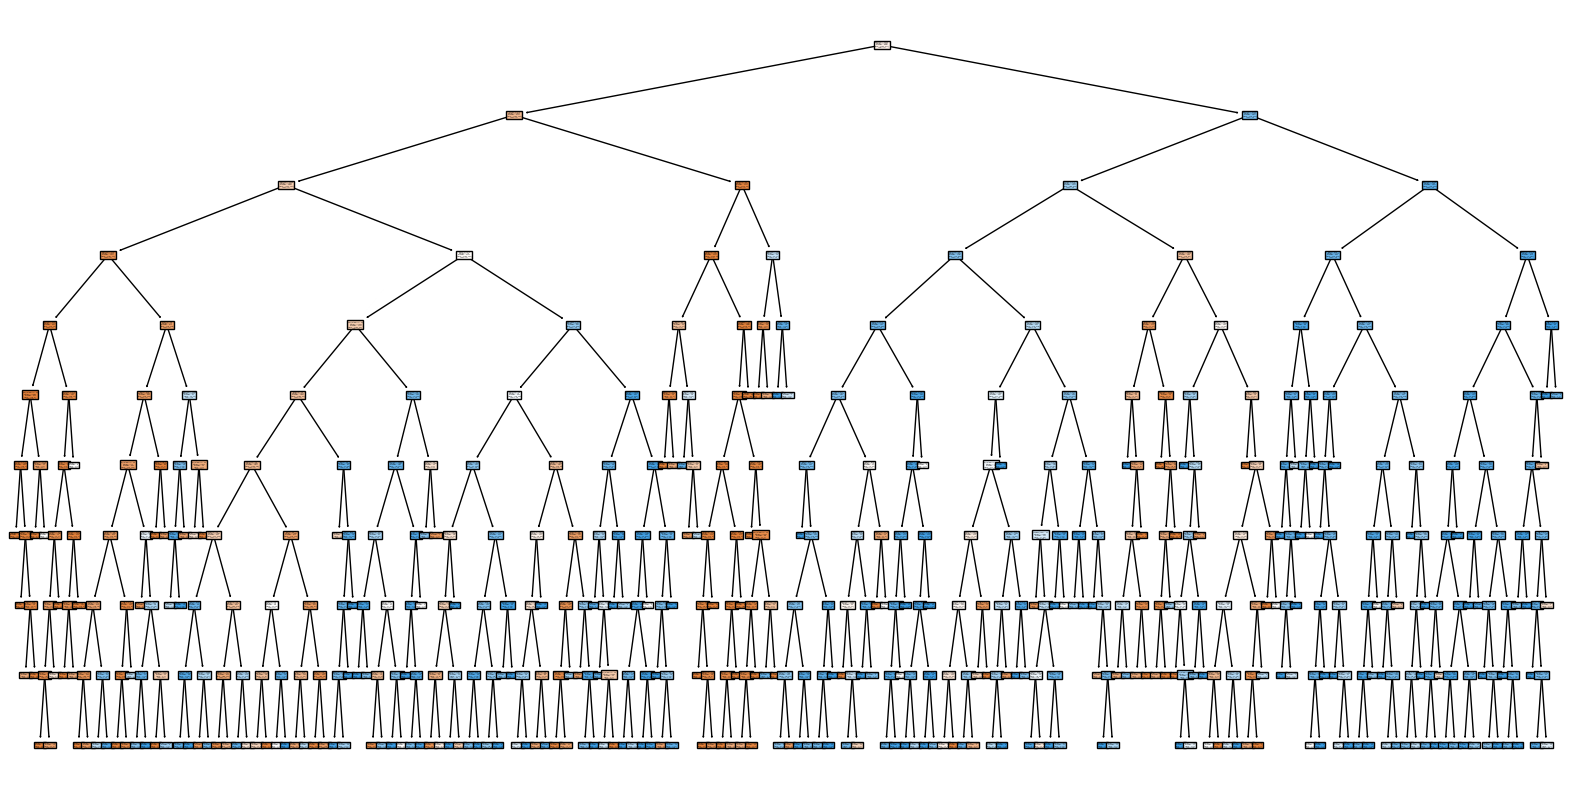

In [47]:
from sklearn import tree

plt.figure(figsize=(20,10))  # Adjust the figure size as needed
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No", "Yes"]) 
plt.show()

## ***Save the Model***

In [48]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='Decision_tree_02.dot', feature_names=X.columns, filled=True, rounded=True)

---

# ***Contact Details:***

*Click on link below to contact/follow/correct me:*

- [LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/)
- [Facebook](https://www.facebook.com/profile.php?id=61552023122774)
- [Twitter](https://twitter.com/mehakkhan874)
- [Kaggle](https://www.kaggle.com/mehakiftikhar)
- [Medium](https://medium.com/@mehakkhan301007)
- [Github](https://github.com/mehakiftikhar)